# Handwritten digits classification using neural network with Tensorboard Visualization

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print("size of x_train",x_train.shape)
print("size of x_test",x_test.shape)
print("size of y_train",y_train.shape)
print("size of y_test",y_test.shape)

size of x_train (60000, 28, 28)
size of x_test (10000, 28, 28)
size of y_train (60000,)
size of y_test (10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

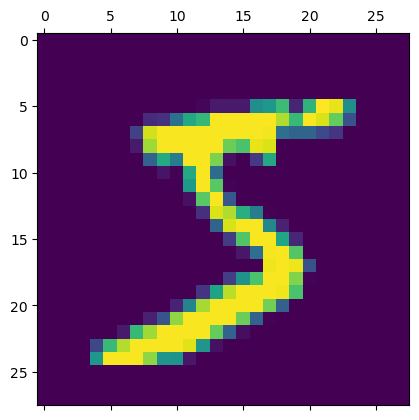

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

# Without the use of hidden layers

In [10]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4760 - accuracy: 0.8739
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9257


In [11]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2678 - accuracy: 0.9254


[0.2677691578865051, 0.9254000186920166]

In [12]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_predicted[0]

array([1.9310750e-02, 2.5689388e-07, 5.5107422e-02, 9.5937341e-01,
       1.5384934e-03, 9.5208742e-02, 2.1204949e-06, 9.9979967e-01,
       8.2546957e-02, 5.7201427e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

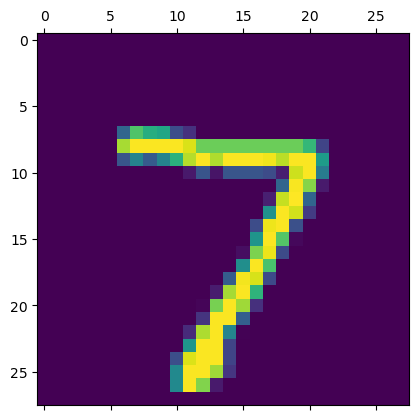

In [15]:
plt.matshow(x_test[0])

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

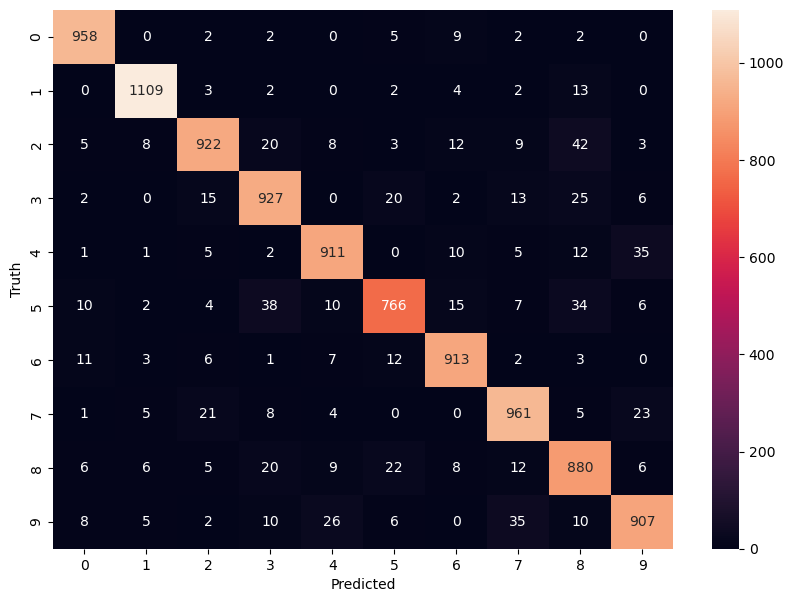

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# By using hidden layers

In [20]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='tanh'),
    keras.layers.Dense(30,activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2923 - accuracy: 0.9177
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1284 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0656 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0515 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0253 - accuracy: 0.9917
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

In [19]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='tanh'),
    keras.layers.Dense(30,activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6767 - accuracy: 0.8368
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3421 - accuracy: 0.9062
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2853 - accuracy: 0.9188
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2522 - accuracy: 0.9286
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2277 - accuracy: 0.9358
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2080 - accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1914 - accuracy: 0.9455
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1773 - accuracy: 0.9492
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1648 - accuracy: 0.9526
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.15

In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9752


[0.08827728778123856, 0.9751999974250793]

In [22]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

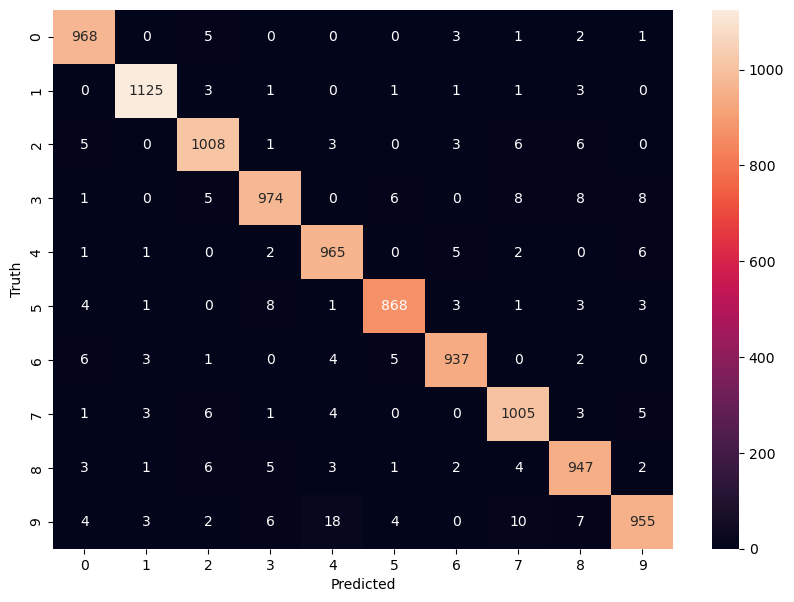

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
%load_ext tensorboard
%tensorboard --logdir logs/fit